## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
df= pd.read_csv(r"C:\Users\Admin\Downloads\IneuBytes\Task 1\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the missing values count for each column
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Exploratory Data Analysis (EDA)

In [5]:
# Summary statistics
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

## Check for missing values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

723

In [8]:
# Drop duplicates
df1 = df.drop_duplicates()

In [9]:
# Check for duplicates after dropping
df1.duplicated().sum()

0

## Data visualization 

<AxesSubplot: xlabel='age', ylabel='count'>

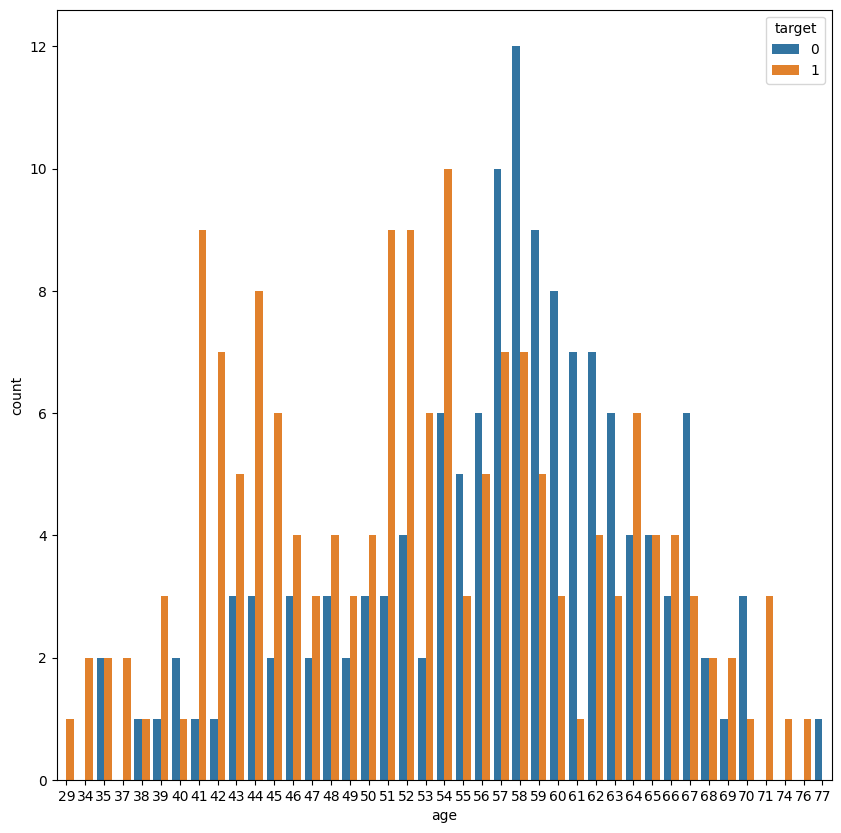

In [10]:
plt.figure(figsize= ( 10, 10))
sns.countplot(data=df1, x="age", hue="target")

C:\Users\Admin\AppData\Local\Temp\ipykernel_5996\4218279302.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1.hist(ax=ax)


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

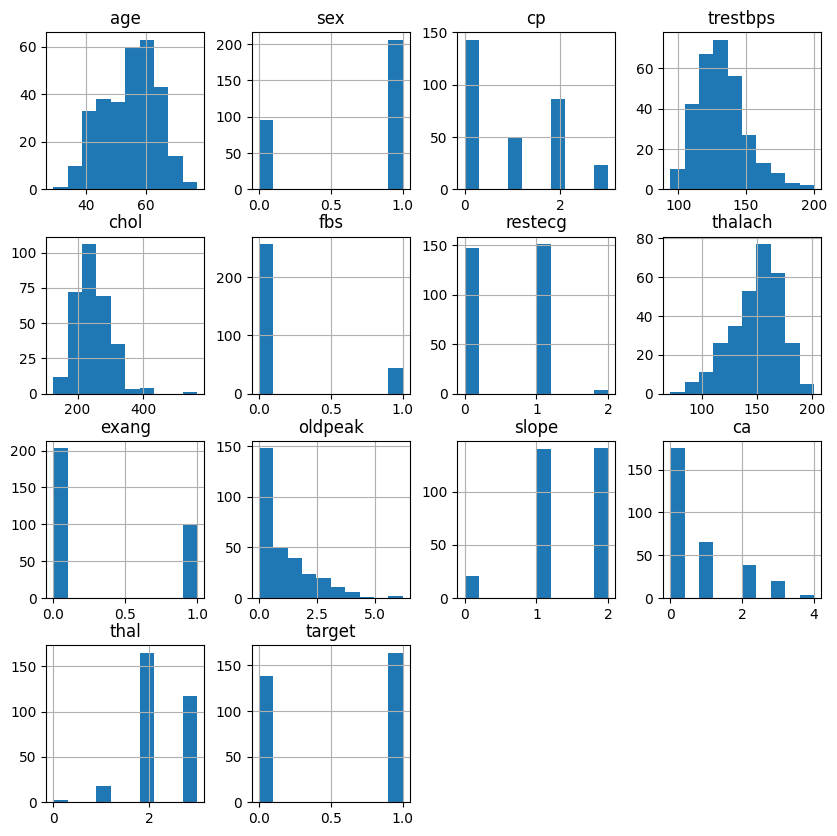

In [11]:
fig,ax=plt.subplots(figsize=(10,10))
df1.hist(ax=ax)

Total Features - 13

Categorical Features(8)- Sex, Cp, Fbs, restecg, exang, slope,ca, thal

Numerical Features(5)- Age, Trestbps, chol, thalach, oldpeak

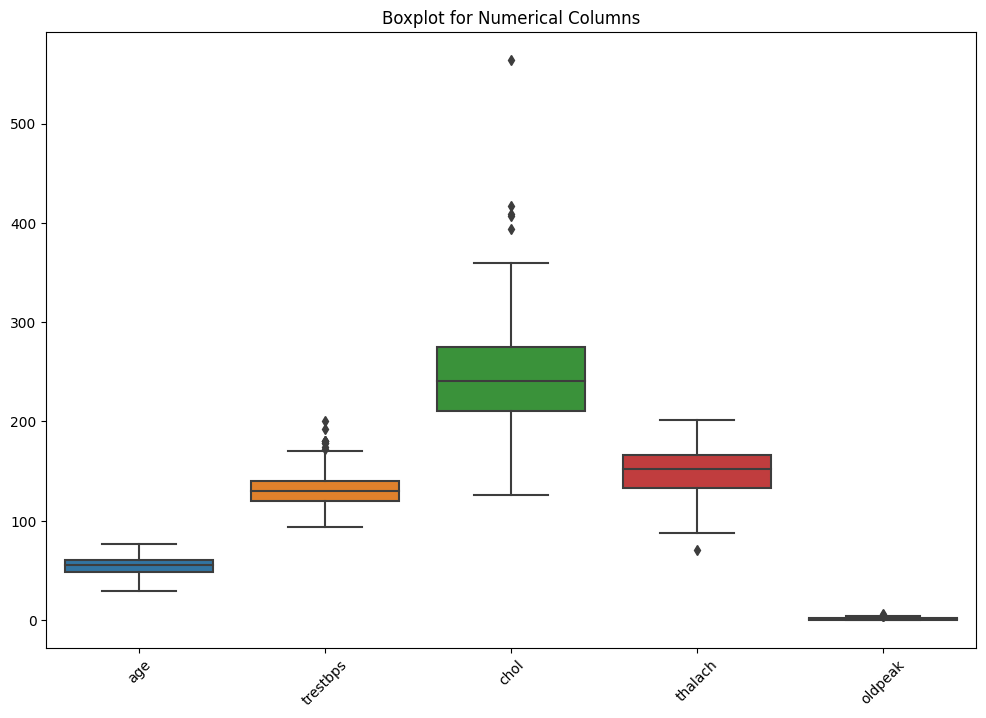

In [12]:
# Boxplot for numerical columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Boxplot for Numerical Columns")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Remove outliers using the IQR method for specific columns
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

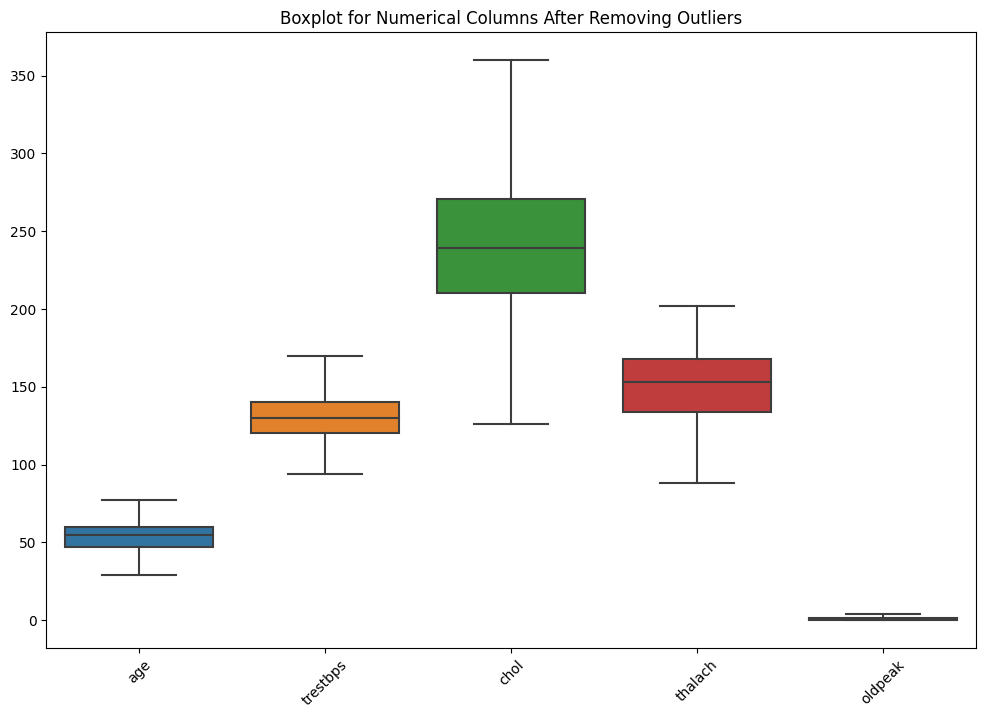

In [14]:
# Specify columns for which you want to remove outliers
columns_with_outliers = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df1 = remove_outliers_iqr(df1, columns_with_outliers)

# After removing outliers, you can visualize the boxplots again to check the results
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Boxplot for Numerical Columns After Removing Outliers")
plt.xticks(rotation=45)
plt.show()

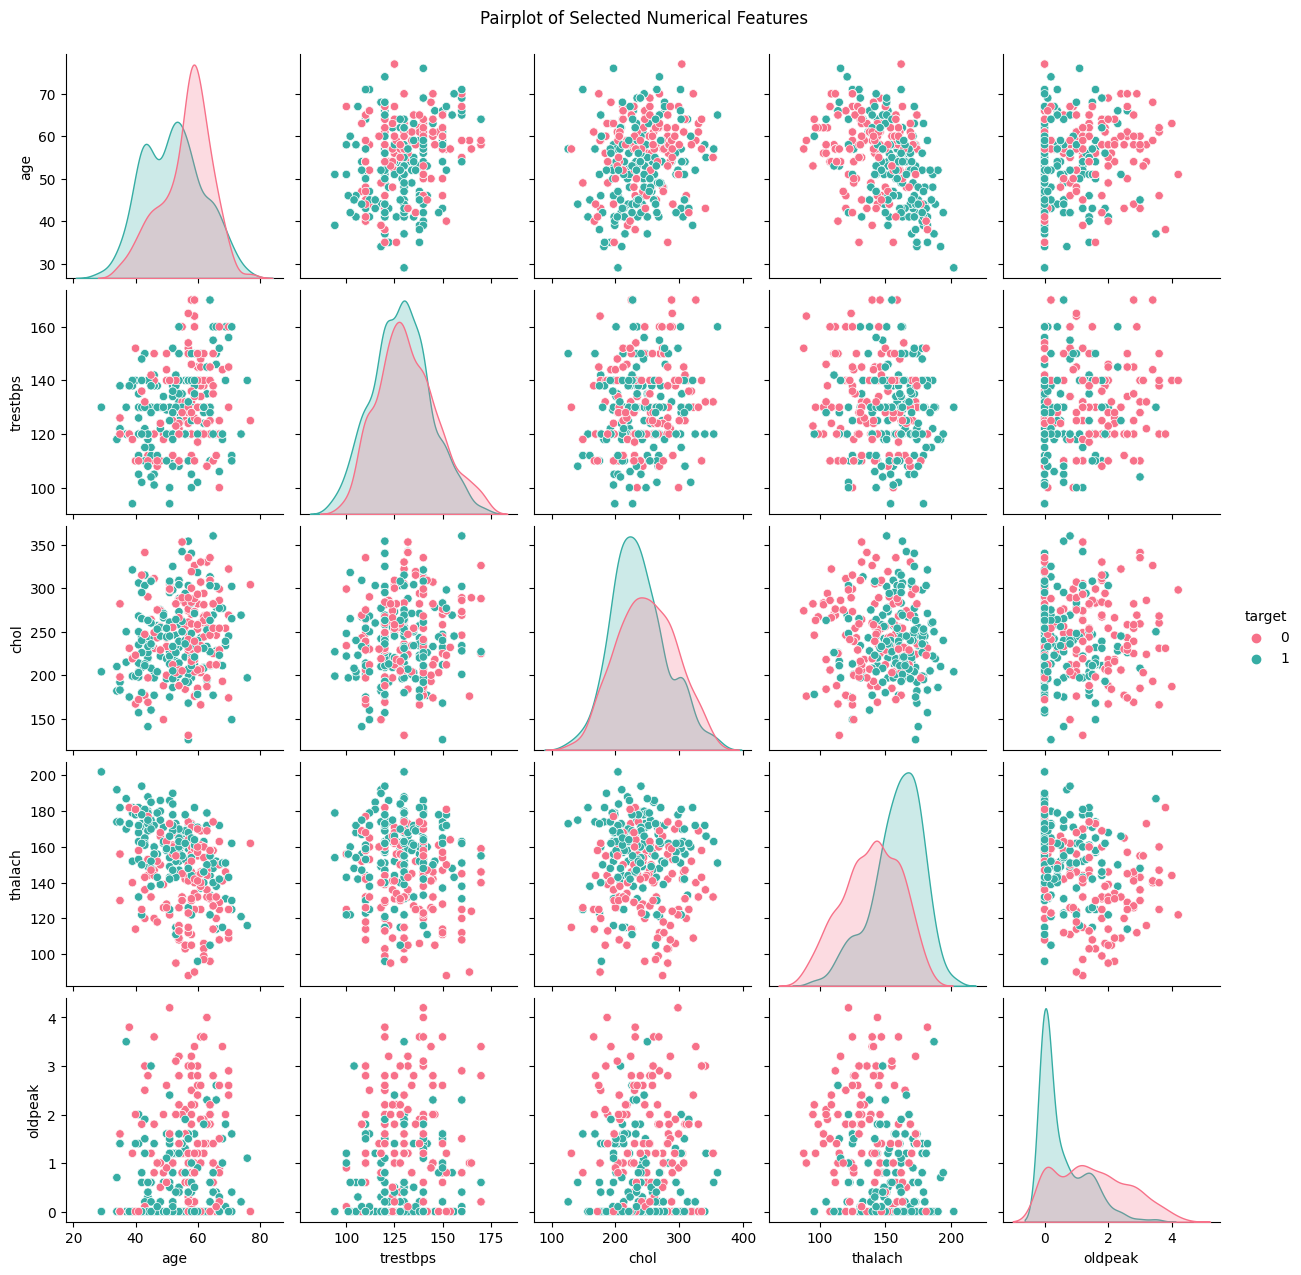

In [36]:
#Pairplot of a subset of features
subset_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create the pairplot for each class
sns.pairplot(df1, hue='target', vars=subset_features, diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

1    0.526971
0    0.473029
Name: target, dtype: float64


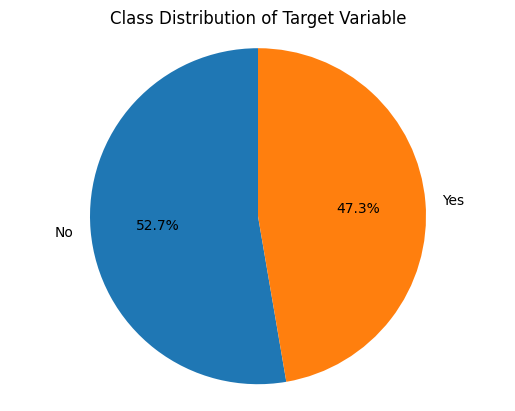

In [37]:
# Calculate Class Proportions:
class_proportions = df1['target'].value_counts(normalize=True)
print(class_proportions)

# Create a pie chart to visualize the class distribution
plt.pie(class_proportions, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.title("Class Distribution of Target Variable")
plt.show()

## Correlation heatmap

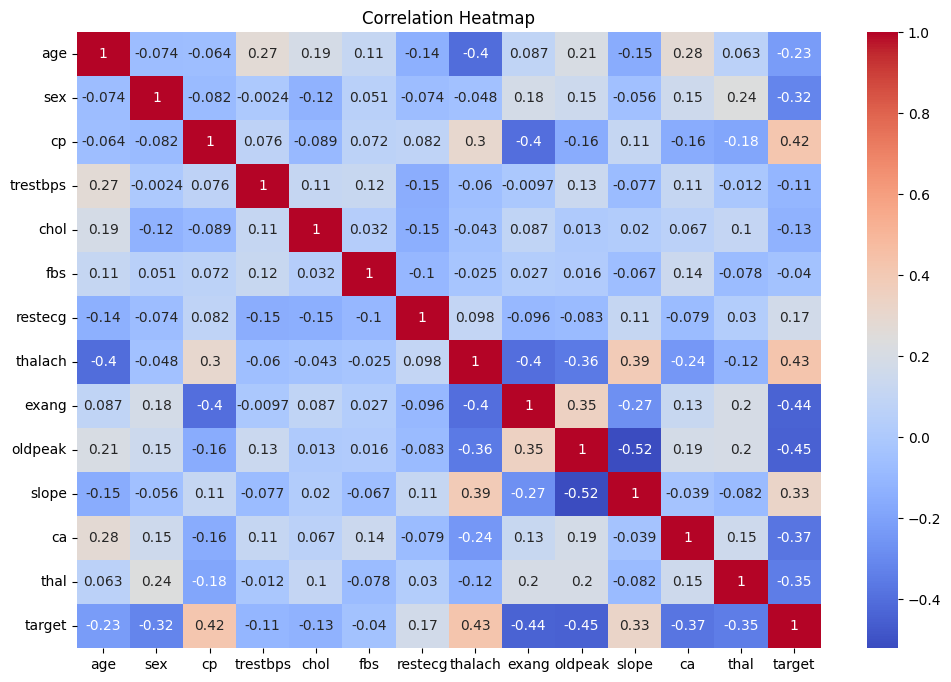

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Model Implementation

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [18]:
# Split the data into features (X) and the target variable (y)
X = df1.drop('target', axis=1)
y = df1['target']

In [19]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize the features (important for K-Nearest Neighbors)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN Algorithm

In [21]:
# Initialize and train the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [22]:
# Predict the target values on the test set
knn_predictions = knn_classifier.predict(X_test_scaled)

In [23]:
# Evaluate K-Nearest Neighbors classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)

In [24]:
print("K-Nearest Neighbors Classifier Performance:")
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_classification_report)
print("Confusion Matrix:\n", knn_confusion_matrix)
print("ROC AUC Score:", knn_roc_auc)

K-Nearest Neighbors Classifier Performance:
Accuracy: 0.8245614035087719
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.82      0.87      0.84        31

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57

Confusion Matrix:
 [[20  6]
 [ 4 27]]
ROC AUC Score: 0.8200992555831266


## Elbow method

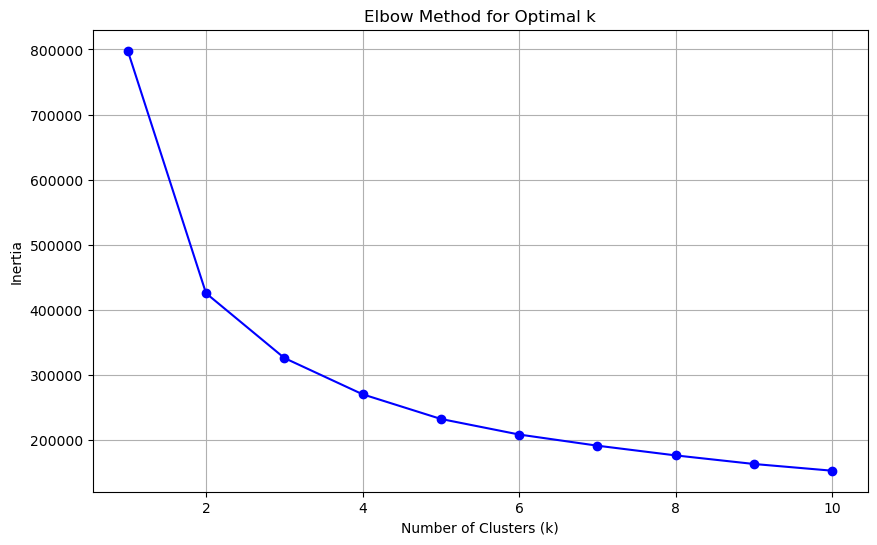

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select the columns you want to use for clustering
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Extract the data for clustering
X = df1[selected_columns]

# Initialize a list to store the inertia values
inertia_values = []

# Try different values of k (number of clusters)
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## Cross Validation & Overfitting Check 

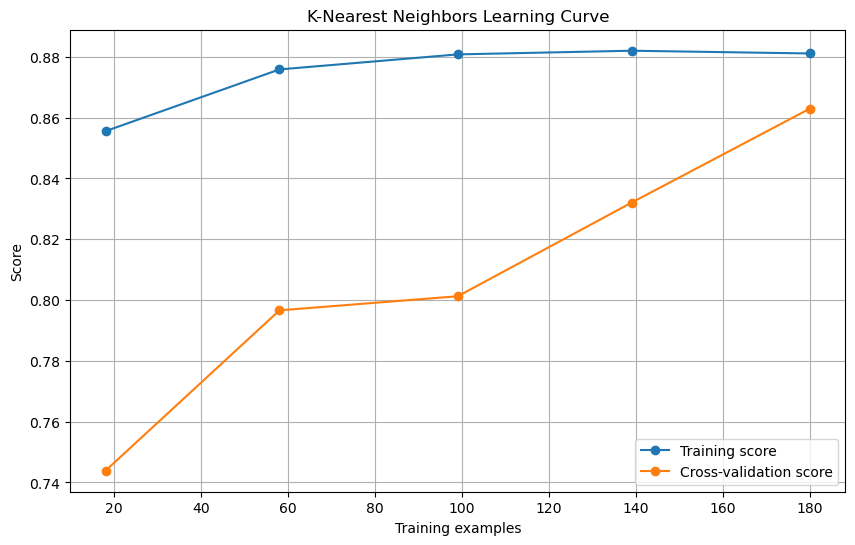

K-Nearest Neighbors Cross-Validation Mean Score: 0.8629951690821256


In [26]:
from sklearn.model_selection import cross_val_score, learning_curve

# Cross-validation for KNN
knn_cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
knn_mean_cv_score = np.mean(knn_cv_scores)

# Learning curve for KNN
train_sizes, train_scores, test_scores = learning_curve(knn_classifier, X_train_scaled, y_train, cv=5)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.title("K-Nearest Neighbors Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")

plt.legend(loc="best")
plt.show()

print("K-Nearest Neighbors Cross-Validation Mean Score:", knn_mean_cv_score)



## Naive bayes

In [27]:
# Initialize and train the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [28]:
# Predict the target values on the test set
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)

In [29]:
# Evaluate Naive Bayes classifier
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
naive_bayes_classification_report = classification_report(y_test, naive_bayes_predictions)
naive_bayes_confusion_matrix = confusion_matrix(y_test, naive_bayes_predictions)
naive_bayes_roc_auc = roc_auc_score(y_test, naive_bayes_predictions)

In [30]:
print("\nGaussian Naive Bayes Classifier Performance:")
print("Accuracy:", naive_bayes_accuracy)
print("Classification Report:\n", naive_bayes_classification_report)
print("Confusion Matrix:\n", naive_bayes_confusion_matrix)
print("ROC AUC Score:", naive_bayes_roc_auc)


Gaussian Naive Bayes Classifier Performance:
Accuracy: 0.8771929824561403
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.90      0.87      0.89        31

    accuracy                           0.88        57
   macro avg       0.88      0.88      0.88        57
weighted avg       0.88      0.88      0.88        57

Confusion Matrix:
 [[23  3]
 [ 4 27]]
ROC AUC Score: 0.8777915632754343


## Cross Validation & Overfitting Check 

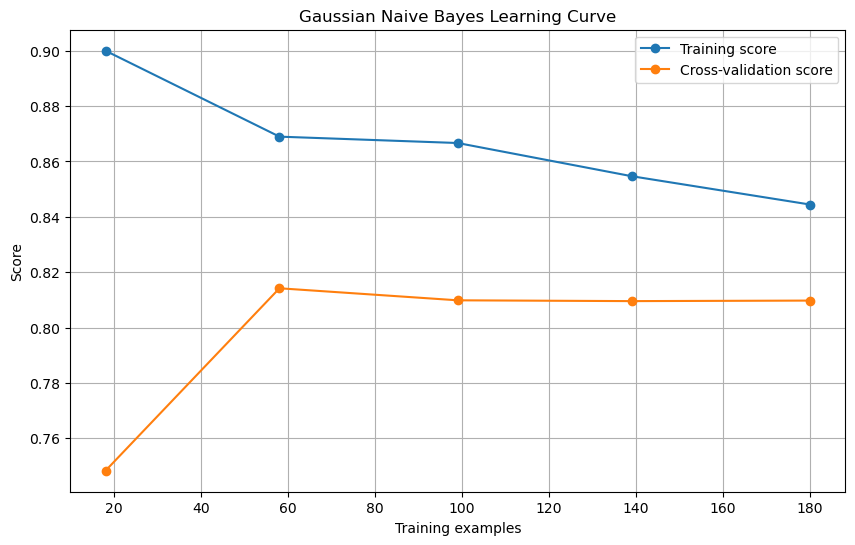

Gaussian Naive Bayes Cross-Validation Mean Score: 0.8142028985507247


In [31]:
# Cross-validation for Naive Bayes
naive_bayes_cv_scores = cross_val_score(naive_bayes_classifier, X_train, y_train, cv=5)
naive_bayes_mean_cv_score = np.mean(naive_bayes_cv_scores)

# Learning curve for Naive Bayes
train_sizes, train_scores, test_scores = learning_curve(naive_bayes_classifier, X_train, y_train, cv=5)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.title("Gaussian Naive Bayes Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")

plt.legend(loc="best")
plt.show()

print("Gaussian Naive Bayes Cross-Validation Mean Score:", naive_bayes_mean_cv_score)


## Decision Tree

In [32]:
# Initialize and train the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
# Predict the target values on the test set
decision_tree_predictions = decision_tree_classifier.predict(X_test)

In [34]:
# Evaluate Decision Tree classifier
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_classification_report = classification_report(y_test, decision_tree_predictions)
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_predictions)

In [35]:
print("\nDecision Tree Classifier Performance:")
print("Accuracy:", decision_tree_accuracy)
print("Classification Report:\n", decision_tree_classification_report)
print("Confusion Matrix:\n", decision_tree_confusion_matrix)
print("ROC AUC Score:", decision_tree_roc_auc)


Decision Tree Classifier Performance:
Accuracy: 0.7543859649122807
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.79      0.74      0.77        31

    accuracy                           0.75        57
   macro avg       0.75      0.76      0.75        57
weighted avg       0.76      0.75      0.75        57

Confusion Matrix:
 [[20  6]
 [ 8 23]]
ROC AUC Score: 0.7555831265508685


## Cross Validation & Overfitting Check 

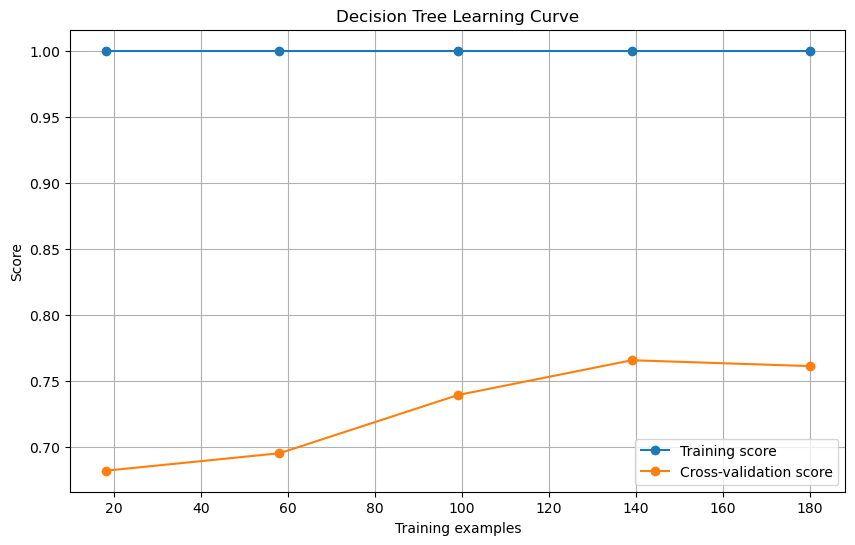

Decision Tree Cross-Validation Mean Score: 0.7567149758454106


In [36]:
# Cross-validation for Decision Tree
decision_tree_cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=5)
decision_tree_mean_cv_score = np.mean(decision_tree_cv_scores)

# Learning curve for Decision Tree
train_sizes, train_scores, test_scores = learning_curve(decision_tree_classifier, X_train, y_train, cv=5)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")

plt.legend(loc="best")
plt.show()

print("Decision Tree Cross-Validation Mean Score:", decision_tree_mean_cv_score)
